# COVID-19 Testing en Bolivia, serie de tiempo (confirmados + descartados)

In [204]:
print('works')

works


In [205]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import io

import matplotlib.dates as dates

import csv

import unicodedata

print('imports successfull')

imports successfull


# CONFIRMADOS (@mauforonda)

In [206]:
#RAW
url = "https://raw.githubusercontent.com/mauforonda/covid19-bolivia/master/confirmados.csv"
download = requests.get(url).content
confirmados = pd.read_csv(io.StringIO(download.decode('utf-8')))
confirmados.head()


,Fecha,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Tarija,Chuquisaca,Beni,Pando
0,2020-09-15,33619,13192,41819,5442,7387,10566,6268,6968,2358
1,2020-09-14,33619,13192,41819,5442,7387,10566,6268,6968,2358
2,2020-09-13,33296,13142,41759,5413,7294,10371,6204,6954,2358
3,2020-09-12,33082,13065,41691,5380,7255,10087,6127,6937,2358
4,2020-09-11,32950,12889,41653,5359,7166,9845,6019,6933,2358


In [207]:
#change to datetime - confirmados
confirmados['Fecha'] = pd.to_datetime(confirmados['Fecha'])
confirmados.head()

,Fecha,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Tarija,Chuquisaca,Beni,Pando
0,2020-09-15,33619,13192,41819,5442,7387,10566,6268,6968,2358
1,2020-09-14,33619,13192,41819,5442,7387,10566,6268,6968,2358
2,2020-09-13,33296,13142,41759,5413,7294,10371,6204,6954,2358
3,2020-09-12,33082,13065,41691,5380,7255,10087,6127,6937,2358
4,2020-09-11,32950,12889,41653,5359,7166,9845,6019,6933,2358


In [208]:
#set index confirmados
confirmados = confirmados.set_index('Fecha')
confirmados.head()

,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Tarija,Chuquisaca,Beni,Pando
Fecha,,,,,,,,,
2020-09-15,33619,13192,41819,5442,7387,10566,6268,6968,2358
2020-09-14,33619,13192,41819,5442,7387,10566,6268,6968,2358
2020-09-13,33296,13142,41759,5413,7294,10371,6204,6954,2358
2020-09-12,33082,13065,41691,5380,7255,10087,6127,6937,2358
2020-09-11,32950,12889,41653,5359,7166,9845,6019,6933,2358


In [209]:
#change to lowercase
confirmados.columns = confirmados.columns.str.lower()
confirmados.head()

,la paz,cochabamba,santa cruz,oruro,potosí,tarija,chuquisaca,beni,pando
Fecha,,,,,,,,,
2020-09-15,33619,13192,41819,5442,7387,10566,6268,6968,2358
2020-09-14,33619,13192,41819,5442,7387,10566,6268,6968,2358
2020-09-13,33296,13142,41759,5413,7294,10371,6204,6954,2358
2020-09-12,33082,13065,41691,5380,7255,10087,6127,6937,2358
2020-09-11,32950,12889,41653,5359,7166,9845,6019,6933,2358


In [210]:
#confirmados.potosí.rename({'potosí':'potosi'}, inplace=True)

In [211]:
confirmados = confirmados.rename(columns = {'potosí':'potosi'})
# confirmados['potosí'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
# confirmados.head()

# confirmados.potosí = confirmados.potosí.str.replace('potosí', 'potosi')
# confirmados.head()

# confirmados.potosí = confirmados.potosí.rename({'potosí':'potosi'}, inplace=True, axis=1)
# confirmados.potosi()

#data.rename(columns={'gdp':'log(gdp)'}, inplace=True)
#df.columns = df.columns.str.replace('gdp', 'log(gdp)')
#df=df.rename(columns = {'two':'new_name'})



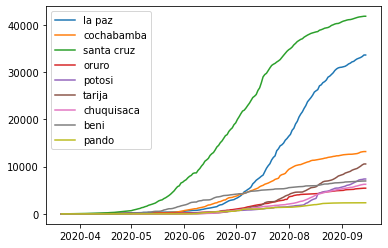

In [212]:
#plot
plt.plot(confirmados)
plt.legend(confirmados)
plt.show()


# DESCARTADOS (@edu_arraya, pr0nstar)

In [213]:
#RAW
url= "https://raw.githubusercontent.com/pr0nstar/covid19-pruebas/master/data/testing.csv"
download = requests.get(url).content
testing = pd.read_csv(io.StringIO(download.decode('utf-8')))

testing.head()

,Fecha,La Paz,Unnamed: 2,Cochabamba,Unnamed: 4,Santa Cruz,Unnamed: 6,Oruro,Unnamed: 8,Potosi,Unnamed: 10,Tarija,Unnamed: 12,Chuquisaca,Unnamed: 14,Beni,Unnamed: 16,Pando,Unnamed: 18
0,NaN,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados
1,2020/05/07,51,2294,25,1159,NaN,3444,2,465,20,156,15,50,22,175,123,230,15,76
2,2020/05/08,64,2399,29,1203,NaN,3532,1,472,20,170,10,60,44,176,NaN,230,13,79
3,2020/05/09,67,2515,29,1244,NaN,3638,15,475,33,186,10,61,NaN,NaN,NaN,239,NaN,NaN
4,2020/05/10,57,2578,29,1252,NaN,3889,0,492,4,215,25,61,29,228,182,244,NaN,NaN


In [214]:
#MultIndex Sospechosos and Descartados
testing_columns = [idx.lower() for idx in testing.columns[1:] if 'Unnamed' not in idx]
testing_idx = pd.MultiIndex.from_product([testing_columns, testing.iloc[0].reset_index()[1:][0].unique()])


testing.head()

,Fecha,La Paz,Unnamed: 2,Cochabamba,Unnamed: 4,Santa Cruz,Unnamed: 6,Oruro,Unnamed: 8,Potosi,Unnamed: 10,Tarija,Unnamed: 12,Chuquisaca,Unnamed: 14,Beni,Unnamed: 16,Pando,Unnamed: 18
0,NaN,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados
1,2020/05/07,51,2294,25,1159,NaN,3444,2,465,20,156,15,50,22,175,123,230,15,76
2,2020/05/08,64,2399,29,1203,NaN,3532,1,472,20,170,10,60,44,176,NaN,230,13,79
3,2020/05/09,67,2515,29,1244,NaN,3638,15,475,33,186,10,61,NaN,NaN,NaN,239,NaN,NaN
4,2020/05/10,57,2578,29,1252,NaN,3889,0,492,4,215,25,61,29,228,182,244,NaN,NaN


In [215]:
#Index Dates
testing['Fecha'] = pd.to_datetime(testing['Fecha'])
testing = testing.set_index('Fecha')


testing.head()

,La Paz,Unnamed: 2,Cochabamba,Unnamed: 4,Santa Cruz,Unnamed: 6,Oruro,Unnamed: 8,Potosi,Unnamed: 10,Tarija,Unnamed: 12,Chuquisaca,Unnamed: 14,Beni,Unnamed: 16,Pando,Unnamed: 18
Fecha,,,,,,,,,,,,,,,,,,
NaT,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados,Sospechosos,Descartados
2020-05-07,51,2294,25,1159,NaN,3444,2,465,20,156,15,50,22,175,123,230,15,76
2020-05-08,64,2399,29,1203,NaN,3532,1,472,20,170,10,60,44,176,NaN,230,13,79
2020-05-09,67,2515,29,1244,NaN,3638,15,475,33,186,10,61,NaN,NaN,NaN,239,NaN,NaN
2020-05-10,57,2578,29,1252,NaN,3889,0,492,4,215,25,61,29,228,182,244,NaN,NaN


In [216]:
testing = testing.iloc[1:]

testing.head()

,La Paz,Unnamed: 2,Cochabamba,Unnamed: 4,Santa Cruz,Unnamed: 6,Oruro,Unnamed: 8,Potosi,Unnamed: 10,Tarija,Unnamed: 12,Chuquisaca,Unnamed: 14,Beni,Unnamed: 16,Pando,Unnamed: 18
Fecha,,,,,,,,,,,,,,,,,,
2020-05-07,51,2294,25,1159,NaN,3444,2,465,20,156,15,50,22,175,123,230,15,76
2020-05-08,64,2399,29,1203,NaN,3532,1,472,20,170,10,60,44,176,NaN,230,13,79
2020-05-09,67,2515,29,1244,NaN,3638,15,475,33,186,10,61,NaN,NaN,NaN,239,NaN,NaN
2020-05-10,57,2578,29,1252,NaN,3889,0,492,4,215,25,61,29,228,182,244,NaN,NaN
2020-05-11,73,2657,20,1256,NaN,4346,39,505,NaN,NaN,37,62,52,239,215,253,0,95


In [217]:
#?????
testing = testing.iloc[1:]
testing.columns = testing_idx

testing.head()

la paz              cochabamba              santa cruz  \
           Sospechosos Descartados Sospechosos Descartados Sospechosos   
Fecha                                                                    
2020-05-08          64        2399          29        1203         NaN   
2020-05-09          67        2515          29        1244         NaN   
2020-05-10          57        2578          29        1252         NaN   
2020-05-11          73        2657          20        1256         NaN   
2020-05-12         NaN        2757          50        1352         NaN   

                             oruro                  potosi              \
           Descartados Sospechosos Descartados Sospechosos Descartados   
Fecha                                                                    
2020-05-08        3532           1         472          20         170   
2020-05-09        3638          15         475          33         186   
2020-05-10        3889           0         492           4         215   
2020-05-11        4346          39         505         NaN         NaN   
2020-05-12        4504          21         519          13         228   

                tarija              chuquisaca                    beni  \
           Sospechosos Descartados Sospechosos Descartados Sospechosos   
Fecha                                                                    
2020-05-08          10          60          44         176         NaN   
2020-05-09          10          61         NaN         NaN         NaN   
2020-05-10          25          61          29         228         182   
2020-05-11          37          62          52         239         215   
2020-05-12          15          81          76         239         NaN   

                             pando              
           Descartados Sospechosos Descartados  
Fecha                                           
2020-05-08         230          13          79  
2020-05-09         239         NaN         NaN  
2020-05-10         244         NaN         NaN  
2020-05-11         253           0          95  
2020-05-12         322           2          95

In [218]:
#re-organize table

testing = testing.astype(np.float32)
testing = testing.interpolate(method='quadratic')
testing = testing.swaplevel(axis=1).sort_index(level=0, axis=1)

testing.head()

Descartados                                                   \
                  beni  chuquisaca cochabamba  la paz  oruro      pando   
Fecha                                                                     
2020-05-08       230.0  176.000000     1203.0  2399.0  472.0  79.000000   
2020-05-09       239.0  206.842957     1244.0  2515.0  475.0  87.202744   
2020-05-10       244.0  228.000000     1252.0  2578.0  492.0  92.536079   
2020-05-11       253.0  239.000000     1256.0  2657.0  505.0  95.000000   
2020-05-12       322.0  239.000000     1352.0  2757.0  519.0  95.000000   

                                         Sospechosos                        \
                potosi santa cruz tarija        beni chuquisaca cochabamba   
Fecha                                                                        
2020-05-08  170.000000     3532.0   60.0         NaN  44.000000       29.0   
2020-05-09  186.000000     3638.0   61.0         NaN  25.422331       29.0   
2020-05-10  215.000000     3889.0   61.0  182.000000  29.000000       29.0   
2020-05-11  227.124634     4346.0   62.0  215.000000  52.000000       20.0   
2020-05-12  228.000000     4504.0   81.0  184.458221  76.000000       50.0   

                                                                     
               la paz oruro      pando     potosi santa cruz tarija  
Fecha                                                                
2020-05-08  64.000000   1.0  13.000000  20.000000        NaN   10.0  
2020-05-09  67.000000  15.0   5.198080  33.000000        NaN   10.0  
2020-05-10  57.000000   0.0   0.864746   4.000000        NaN   25.0  
2020-05-11  73.000000  39.0   0.000000   2.315644        NaN   37.0  
2020-05-12  90.354965  21.0   2.000000  13.000000        NaN   15.0

In [219]:
# #delete sospechosos columns method 2
# testing.Sospechosos.drop(testing.Sospechosos, axis=1)
# testing.Sospechosos.head()

In [220]:
# testing.drop(columns= ['beni','tarija', 'chuquisaca', 'cochabamba', 'la paz', 'oruro', 'pando', 'potosi', 'santa cruz'])
# testing.head()

In [221]:
testing.Descartados.head()

,beni,chuquisaca,cochabamba,la paz,oruro,pando,potosi,santa cruz,tarija
Fecha,,,,,,,,,
2020-05-08,230.0,176.000000,1203.0,2399.0,472.0,79.000000,170.000000,3532.0,60.0
2020-05-09,239.0,206.842957,1244.0,2515.0,475.0,87.202744,186.000000,3638.0,61.0
2020-05-10,244.0,228.000000,1252.0,2578.0,492.0,92.536079,215.000000,3889.0,61.0
2020-05-11,253.0,239.000000,1256.0,2657.0,505.0,95.000000,227.124634,4346.0,62.0
2020-05-12,322.0,239.000000,1352.0,2757.0,519.0,95.000000,228.000000,4504.0,81.0


In [222]:
type(testing)

pandas.core.frame.DataFrame

No handles with labels found to put in legend.


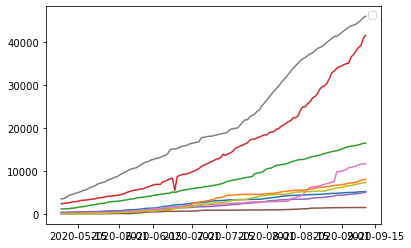

In [223]:
plt.plot(testing.Descartados)
plt.legend()
#plt.show(testing)



In [224]:
# tot_tests = ([confirmados] + [testing.Descartados])
# tot_tests

In [225]:
#type(tot_tests)

In [226]:
# df = pd.DataFrame(tot_tests)
# df.to_csv('file2.csv', index=False, header=False,)
# df

In [242]:
tot_tests = (confirmados + testing.Descartados)

In [243]:
tot_tests

,beni,chuquisaca,cochabamba,la paz,oruro,pando,potosi,santa cruz,tarija
Fecha,,,,,,,,,
2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-09-11,12201.0,14069.0,29386.0,74555.0,10444.0,3906.0,18883.0,87704.0,17215.0
2020-09-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
tot_tests.to_csv("./tot_tests.csv", sep=',',index=True)

In [233]:
#np.savetxt("tot_tests.csv", tot_tests, delimiter=",", fmt='%s')
